Question #1:

a) A Classification Decision Tree addresses problems where the goal is to assign items into predefined categories or classes based on their features. This is known as a classification problem.

Examples of real-world applications include:
1. Medical Diagnosis: Predicting whether a patient has a specific disease (e.g., diabetes or not) based on features like age, blood pressure, and glucose levels.
2. Fraud Detection: Classifying transactions as fraudulent or legitimate using features like transaction amount, time, and location.
3. Customer Segmentation: Grouping customers into categories such as "high-value" or "low-value" based on purchasing behavior and demographics.
4. Loan Approval: Determining whether a loan application should be approved or rejected based on income, credit score, and employment status.

b) A Classification Decision Tree makes predictions by splitting the dataset into subsets based on feature values, using conditions like "Is feature 𝑥 > 𝑐" at each node. The tree structure consists of branches (conditions) that eventually lead to leaf nodes, which represent the predicted class. For example: A decision tree might classify a customer as "high-value" or "low-value" based on conditions like income > 50k or age < 30.
- In contrast, Multiple Linear Regression predicts a continuous numerical value, not a class. It assumes a linear relationship between input features and the output, using an equation

Key differences:
- Type of Output: Decision Trees predict categories (classification); Multiple Linear Regression predicts continuous values (regression).
- Interpretation of Features: Decision Trees split data hierarchically; Multiple Linear Regression calculates a weighted sum of features.
- Structure: Decision Trees produce a flowchart-like model; Linear Regression produces a single mathematical equation.


Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d3f3b-1b84-8002-8c12-463ef5a3d673

Summary of discussion:
- Classification Decision Tree: Solves classification problems by splitting data into categories based on feature values (e.g., medical diagnosis, fraud detection).
- Comparison with Linear Regression: Decision Trees classify items, while Linear Regression predicts continuous values using a linear equation.

Question #2:

1. Accuracy:
- When to use it: It's best when you care about the overall correct predictions, both positives and negatives.
- Example: In a task like sorting images into two groups (e.g., cats vs. dogs), accuracy measures how many pictures you classified correctly overall, regardless of the type.

2. Sensitivity (also called Recall):
- When to use it: It's important when you want to find as many true positives as possible (even at the cost of some mistakes).
- Example: In medical testing for a disease, you'd use sensitivity to make sure you catch as many sick patients as possible, even if some healthy people are incorrectly flagged as sick (false positives).

3. Specificity:
- When to use it: It’s important when you want to correctly identify negatives and avoid false positives.
- Example: In drug testing, you want to make sure that healthy people aren't mistakenly identified as sick (false positives), so specificity is key to avoid unnecessary treatments or worry.

4. Precision:
- When to use it: Precision matters when you want to ensure that positive predictions are very accurate.
- Example: In spam email filtering, you want to make sure that only real spam emails are classified as spam, and not legitimate emails, so you focus on precision to avoid mistakenly filtering important emails.


Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d3f3b-1b84-8002-8c12-463ef5a3d673

Summary of discussion:
- Accuracy measures overall correct predictions and is useful when overall performance matters, like in image classification.
- Sensitivity focuses on correctly identifying true positives, which is crucial in medical testing.
- Specificity and Precision: Specificity avoids false positives and is used in drug testing, while Precision ensures positive predictions are accurate, useful for spam email detection.

Question #3:

Perform several steps of EDA, such as:
1. Removing unnecessary columns (like Weight_oz, Width, Height).
2. Dropping rows with missing data.
3. Changing the data types for certain columns (like Pub year and NumPages).
4. Descriptive statistics to summarize key metrics (mean, min, max, etc.).
5. Correlation matrix to see how numerical variables are related.

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.0

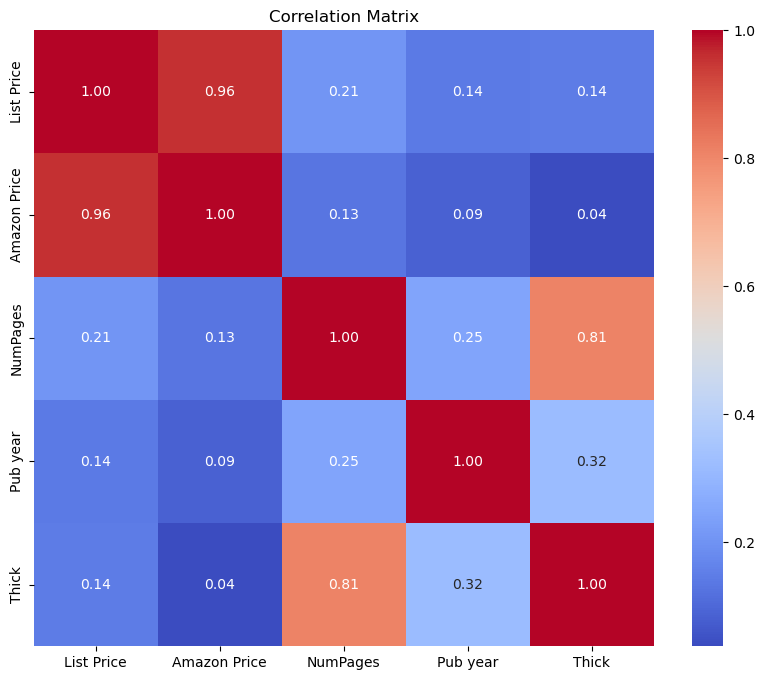

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop the specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to int type using .loc
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to category type using .loc
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display basic information about the dataset
print(ab_reduced_noNaN.info())

# Descriptive statistics for numeric columns
print(ab_reduced_noNaN.describe())

# Display value counts for categorical columns
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())
print(ab_reduced_noNaN['Pub year'].value_counts())

# Select only the numeric columns for correlation
numeric_columns = ab_reduced_noNaN.select_dtypes(include=[np.number])

# Check for correlation (for numerical features)
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

What Does the Heatmap Mean?
- The heatmap visualizes the correlation matrix. Each square shows how strongly two columns are related, with darker colors representing stronger correlations. Here's a quick interpretation:
- Dark red squares (near 1.0 correlation) mean that the two columns have a strong positive relationship.
- Light blue or orange squares (near 0 correlation) mean that the two columns are not strongly related.
- The List Price and Amazon Price cells are bright red, indicating a high positive correlation.
- NumPages and Thick are also strongly correlated


Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d4421-1b1c-8002-9068-4ba2171e1a05

Summary of discussion:
- We performed exploratory data analysis (EDA) on a dataset of 319 books, cleaning the data by removing unnecessary columns, handling missing values, and converting data types. Descriptive statistics and correlations were calculated, revealing strong relationships between List Price and Amazon Price (0.955) and between NumPages and Thick (0.809).
- A correlation matrix and heatmap visualized these relationships, showing that thicker books tend to have more pages, and paperback books are more common than hardcover. We also observed that the majority of books were published in the 2000s, with prices ranging widely.

Question #4:

Step 1: Create an 80/20 Data Split

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each dataset
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Testing set size: 64


Step 2: Fit a DecisionTreeClassifier Model

[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]'),
 Text(0.75, 0.5, 'x[0] <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]')]

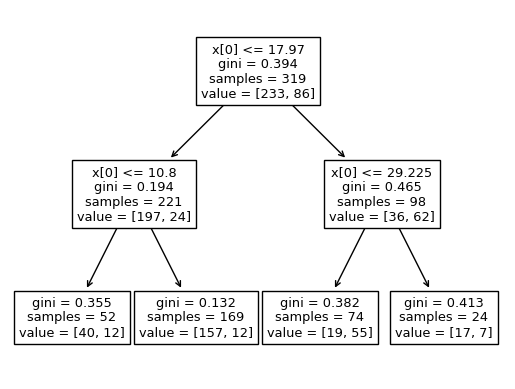

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

# Prepare the target and features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for hardcover, 0 for paperback
X = ab_reduced_noNaN[['List Price']]  # Use only the List Price feature

# Initialize and fit the decision tree model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Plot the decision tree to visualize predictions
tree.plot_tree(clf)

Explanation of the Steps:
1. y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']:

    - This line converts the categorical Hard_or_Paper column into a binary classification. It uses pd.get_dummies to create dummy/indicator variables (0 or 1), and ['H'] selects the "Hardcover" class. 1 means hardcover, and 0 means paperback.
2. X = ab_reduced_noNaN[['List Price']]:

    - This line extracts the List Price column from the dataset as the feature used to make predictions.
3. clf = DecisionTreeClassifier(max_depth=2, random_state=42):

    - This initializes the decision tree classifier with a maximum depth of 2. This means the tree will have at most two levels of decision-making, which helps prevent overfitting and keeps the model simple.
4. clf.fit(X, y):

    - This fits the decision tree model using the training data (X for features and y for target labels).
5. tree.plot_tree(clf):

    - This line visualizes the decision tree, showing the splits made based on List Price and how predictions are made.

What will this do?
- The decision tree will analyze the List Price of the books and predict whether they are hardcovers or paperbacks based on the maximum depth of 2 (i.e., at most two splits).
- The plot will show how the tree splits based on List Price and what the final predictions are for books categorized as hardcover or paperback.


Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d46bd-50a4-8002-ad19-b7f91a1ec6c2

Summary of discussion:
1. 80/20 Data Split: I provided code to split your dataset into 80% training and 20% testing using train_test_split() from sklearn.model_selection and explained how to report the size of each set.
2. Fitting a Decision Tree Classifier: I showed how to fit a DecisionTreeClassifier using the List Price variable to predict whether a book is hardcover or paperback, with a maximum depth of 2. I also included code to visualize the decision tree with tree.plot_tree(clf).

Question #5:

Step 1: Modify the Data and Model

[Text(0.45652173913043476, 0.9, 'x[2] <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.1956521739130435, 0.7, 'x[0] <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]'),
 Text(0.08695652173913043, 0.5, 'x[1] <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30434782608695654, 0.5, 'x[1] <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]'),
 Text(0.21739130434782608, 0.3, 'x[2] <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.391304347826087, 0.3, 'x[0] <= 656.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.34782608695652173, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.43478260869565216, 0.1, 'gini =

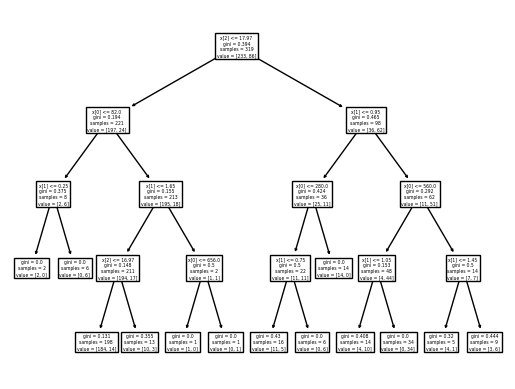

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

# Prepare the target and features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Initialize and fit the decision tree model with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Plot the decision tree to visualize predictions
tree.plot_tree(clf2)

Step 2: General Explanation of How Predictions Are Made for clf2

- Fitting the Model: The decision tree clf2 uses NumPages, Thick, and List Price as features to predict whether a book is hardcover or paperback, with a max_depth of 4. It splits the data at each node to maximize class separation.
- Prediction Process: To make predictions, the model follows the decision path based on the feature values of a new observation. It moves through the tree until reaching a leaf node, where the predicted class (hardcover or paperback) is assigned based on the majority class in that leaf.


Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d46bd-50a4-8002-ad19-b7f91a1ec6c2

Summary of discussion:
- Tree Incompleteness: You asked why the decision tree wasn't complete. I explained that the tree is likely limited by the max_depth=4 parameter, which restricts the number of splits to 4. This can make the tree appear incomplete, as further splits may not improve the model, or the data might not have enough variance to allow for deeper splitting.
- Feature Selection in X: You asked about the meaning of X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]. I explained that this line selects the columns NumPages, Thick, and List Price from the dataset ab_reduced_noNaN to be used as features for the decision tree model.

Question #6:


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd
from sklearn import tree

# Prepare the target and features for training (using the training dataset ab_reduced_noNaN)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Prepare the test set using ab_reduced_noNaN_test
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Initialize and fit the decision tree model clf2 with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Make predictions using clf2 on the test set
y_pred_clf2 = clf2.predict(X_test)

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate sensitivity, specificity, and accuracy for clf2
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = recall_score(y_test, y_pred_clf2, pos_label=0)  # Specificity for the negative class
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print confusion matrix and performance metrics for clf2
print("Confusion Matrix for clf2:")
print(cm_clf2)

print(f"\nSensitivity for clf2: {sensitivity_clf2:.2f}")
print(f"Specificity for clf2: {specificity_clf2:.2f}")
print(f"Accuracy for clf2: {accuracy_clf2:.2f}")


Confusion Matrix for clf2:
[[42  2]
 [ 2 18]]

Sensitivity for clf2: 0.90
Specificity for clf2: 0.95
Accuracy for clf2: 0.94


- True Negative (TN) = 42: These are the cases where the model correctly predicted the negative class (i.e., the book is not "Hard").
- False Positive (FP) = 2: These are the cases where the model incorrectly predicted the positive class (i.e., predicted "Hard" but the book is not "Hard").
- False Negative (FN) = 2: These are the cases where the model incorrectly predicted the negative class (i.e., predicted "Not Hard" but the book is actually "Hard").
- True Positive (TP) = 18: These are the cases where the model correctly predicted the positive class (i.e., predicted "Hard" and the book is actually "Hard").

Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d46bd-50a4-8002-ad19-b7f91a1ec6c2

Summary of discussion:
- You created a decision tree classifier (clf2) and generated a confusion matrix for it, where I explained how to interpret the confusion matrix. For example, in [[42, 2], [2, 18]], 42 is the true negatives (TN), 18 is the true positives (TP), 2 is the false positives (FP), and 2 is the false negatives (FN).
- I provided formulas to calculate sensitivity, specificity, and accuracy from the confusion matrix, and clarified that in the confusion_matrix function, y_true (actual values) goes first, followed by y_pred (predicted values).

Question #7:

The differences between the two confusion matrices are caused by the number and relevance of features used in the models. The first matrix, using only the feature 'List Price', likely results in underfitting because this feature alone may not provide sufficient information to distinguish between "Paper" and "Hard" categories, leading to poor predictions. The second matrix, using multiple features ('NumPages', 'Thick', and 'List Price'), could lead to overfitting if these additional features do not significantly improve predictive accuracy or if they are not well correlated with the target variable, making the model more complex and less generalizable.

In contrast, the confusion matrices for clf and clf2 are better because they use more informative features, leading to more accurate and balanced predictions, which results in higher sensitivity and specificity.
 
Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d46bd-50a4-8002-ad19-b7f91a1ec6c2

Summary of discussion:
- We discussed how decision tree performance is influenced by feature selection and model complexity. Using more features (e.g., 'NumPages', 'Thick', 'List Price') improves predictive accuracy compared to using fewer features like 'List Price'.
- We also examined how limiting tree depth with max_depth=4 in clf2 helps prevent overfitting, leading to better generalization and performance in the confusion matrices.

Question #8:

Steps to visualize feature importances:
- Extract feature importances and feature names:
    - Use clf2.feature_importances_ to get the importance of each feature and clf2.feature_names_in_ to get the corresponding feature names.
- Plot the feature importances:
    - Use a bar chart to visualize which features contribute most to the model. The higher the value of a feature's importance, the more important that feature is for making predictions.
- Identify the most important feature:
    - Find the index of the feature with the highest importance and print the corresponding feature name.

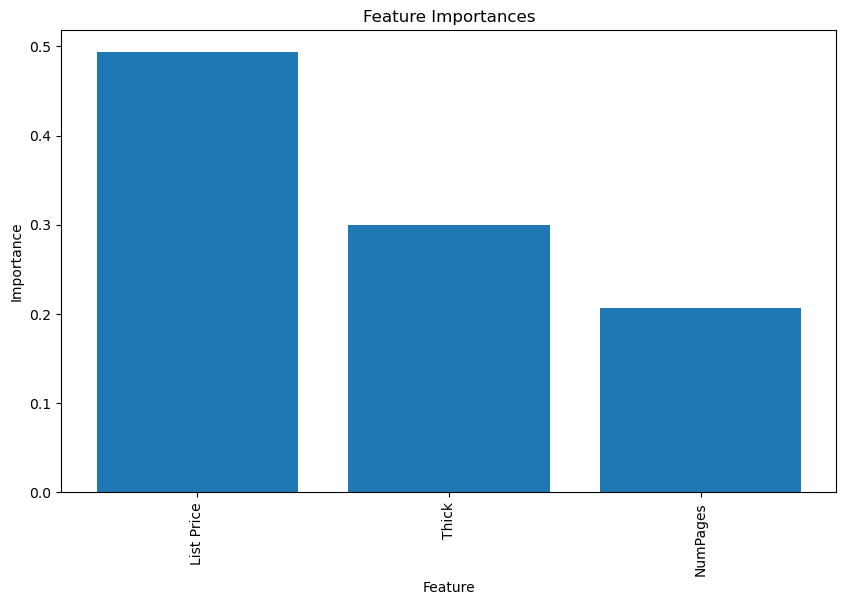

The most important feature for making predictions is: List Price


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is the fitted decision tree classifier
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart
indices = np.argsort(feature_importances)[::-1]  # Sort indices by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Reporting the most important feature
most_important_feature = feature_names[indices[0]]
print(f"The most important feature for making predictions is: {most_important_feature}")

- clf2.feature_importances_: This gives an array where each element corresponds to the importance of each feature.
- clf2.feature_names_in_: This provides the feature names used in the decision tree.
- Sorting and plotting: We sort the features by their importance values and use matplotlib to plot them.


Link to interactive conversation with ChatGPT: https://chatgpt.com/share/673d56f0-1b88-8002-bf95-d0149a930cb8

Summary of discussion:
- Visualizing Feature Importances: I explained how to visualize feature importances from a scikit-learn decision tree classifier (clf2) using the feature_importances_ and feature_names_in_ attributes. I also provided code to plot the importances and identify the most important feature.
- Clarifying clf: I clarified that clf is a common shorthand for a classifier object in scikit-learn, but it’s not built-in. It’s just a variable name for any classifier model.

Question #9:

In linear regression, coefficients show how much each feature directly affects the target variable. In decision trees, feature importance indicates how useful each feature is for making accurate predictions but doesn't show the exact effect on the target.

Question #10: Yes